In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [7]:
df = pd.read_csv(r"C:\Users\NEHA GANESH KURUD\Downloads\Superstore.csv", encoding='latin-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [15]:
# Drop missing values (if any)
df.dropna(inplace=True)

#data Cleaning
df.info()
df.isnull().sum()


# Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

<class 'pandas.core.frame.DataFrame'>
Index: 4042 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         4042 non-null   int64         
 1   Order ID       4042 non-null   object        
 2   Order Date     4042 non-null   datetime64[ns]
 3   Ship Date      4042 non-null   object        
 4   Ship Mode      4042 non-null   object        
 5   Customer ID    4042 non-null   object        
 6   Customer Name  4042 non-null   object        
 7   Segment        4042 non-null   object        
 8   Country        4042 non-null   object        
 9   City           4042 non-null   object        
 10  State          4042 non-null   object        
 11  Postal Code    4042 non-null   int64         
 12  Region         4042 non-null   object        
 13  Product ID     4042 non-null   object        
 14  Category       4042 non-null   object        
 15  Sub-Category   4042 non-nu

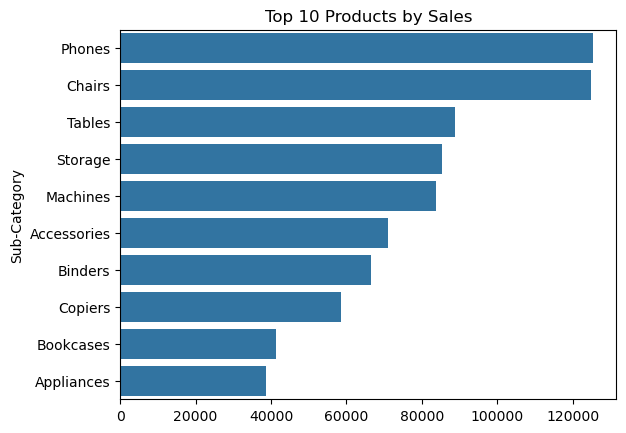

In [16]:
#) Top 10 Products by Sales
top_products = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Products by Sales")
plt.show()


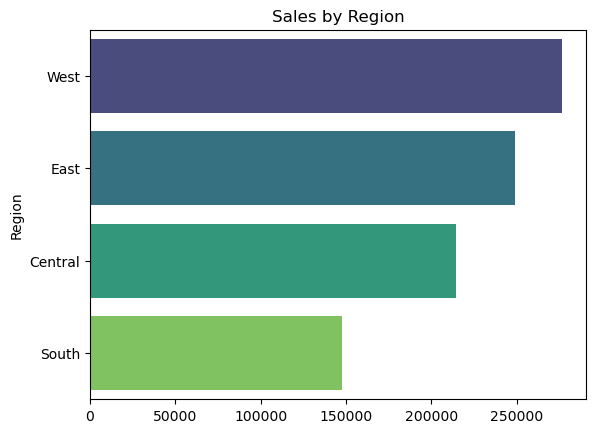

In [20]:
#Region-wise Sales
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
sns.barplot(x=region_sales.values, y=region_sales.index, palette='viridis', hue=region_sales.index, legend=False)


plt.title("Sales by Region")
plt.show()


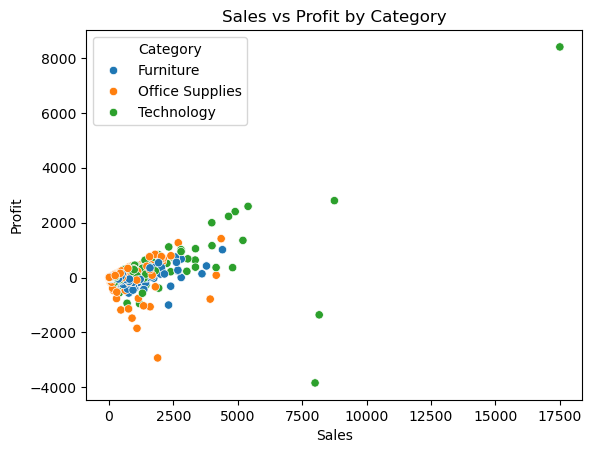

In [21]:
#Sales vs Profit Relationship
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Category')
plt.title("Sales vs Profit by Category")
plt.show()


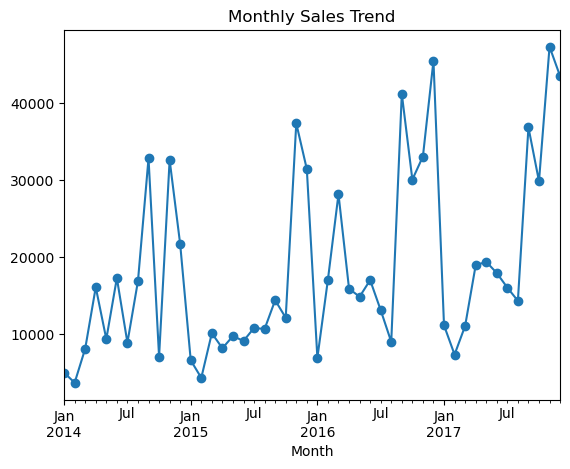

In [22]:
#Monthly Sales Trend
df['Month'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum()
monthly_sales.plot(kind='line', marker='o')
plt.title("Monthly Sales Trend")
plt.show()
